In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pathlib import Path
from typing import List, Dict, Any, Optional, Tuple, Iterable
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import VarianceThreshold

import utils
from config.logger_config import LoggerSetup, log_function

#Configuración de notebook
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

2025-08-26 20:00:34.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 20:00:34.317 No runtime found, using MemoryCacheStorageManager
2025-08-26 20:00:34.318 No runtime found, using MemoryCacheStorageManager
2025-08-26 20:00:34.319 No runtime found, using MemoryCacheStorageManager


In [14]:
# df = pd.read_csv('../data/processed/players_stats_mls24.csv')

## PREPARAR DATAFRAME INICIAL

In [ ]:
df = utils.build_initial_dataframe()

In [16]:
# df.to_csv('../data/raw/all_events_mls24.csv', index=False)

In [17]:
# df_inter_matches_events_v2.to_csv('../data/raw/inter_miami_mls24_events.csv', index=False)

In [18]:
# df = pd.read_csv('../data/raw/all_events_mls24.csv')

## CARGAR DATOS

In [19]:
df_players_season_stats = pd.read_csv('../data/raw/players_stats_mls24.csv')
df_all_events = pd.read_csv('../data/raw/all_events_mls24.csv')
df_teams_season_stats = pd.read_csv('../data/raw/teams_stats_mls24.csv')

## ANÁLISIS EXPLORATORIO

In [20]:
utils.exploratory_analysis(df_players_season_stats, False)

=== Información del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 134 columns):
 #    Column                                                Dtype  
---   ------                                                -----  
 0    team_name                                             object 
 1    team_id                                               object 
 2    competition                                           object 
 3    season                                                int64  
 4    player_id                                             object 
 5    player_name                                           object 
 6    first_name                                            object 
 7    last_name                                             object 
 8    short_name                                            object 
 9    position                                              object 
 10   shirt_number                            

In [21]:
df_players_season_stats.describe()

,season,shirt_number,yellow_cards,unsuccessful_short_passes,tackles_won,goal_assists,goals_from_outside_box,times_tackled,left_foot_goals,successful_passes_own_half,rightside_passes,penalty_goals_conceded,total_unsuccessful_passes_(_excl_crosses_&_corners_),unsuccessful_passes_own_half,unsuccessful_crosses_&_corners,putthrough/blocked_distribution,games_played,unsuccessful_long_passes,aerial_duels_lost,total_fouls_won,aerial_duels,successful_short_passes,successful_dribbles,total_clearances,ground_duels,duels_lost,corners_won,unsuccessful_passes_opposition_half,putthrough/blocked_distribution_won,successful_corners_into_box,appearances,offsides,goals_conceded_inside_box,successful_crosses_open_play,ground_duels_lost,substitute_on,successful_lay_offs,last_player_tackle,successful_passes_opposition_half,ground_duels_won,successful_long_passes,open_play_passes,shots_off_target_(inc_woodwork),blocks,goals_conceded,key_passes_(attempt_assists),unsuccessful_launches,backward_passes,total_passes,total_successful_passes_(_excl_crosses_&_corners_)_,total_shots,leftside_passes,duels,total_fouls_conceded,throw_ins_to_own_player,starts,goals,total_losses_of_possession,total_tackles,aerial_duels_won,total_touches_in_opposition_box,duels_won,shots_on_target_(_inc_goals_),unsuccessful_crosses_open_play,goals_from_inside_box,recoveries,successful_launches,unsuccessful_dribbles,second_goal_assists,blocked_shots,index,time_played,touches,throw_ins_to_opposition_player,tackles_lost,foul_attempted_tackle,interceptions,clean_sheets,through_balls,successful_crosses_&_corners,corners_taken_(incl_short_corners),forward_passes,goals_conceded_outside_box,assists_(intentional),unsuccessful_corners_into_box,substitute_off,successful_open_play_passes,home_goals,away_goals,winning_goal,penalties_conceded,handballs_conceded,clearances_off_the_line,red_cards___2nd_yellow,goal_kicks,gk_successful_distribution,total_red_cards,hit_woodwork,overruns,unsuccessful_lay_offs,headed_goals,penalties_saved,catches,saves_made_from_inside_box,gk_unsuccessful_distribution,saves_made___caught,crosses_not_claimed,saves_from_penalty,saves_made_from_outside_box,drops,punches,saves_made___parried,saves_made,goalkeeper_smother,penalties_faced,set_pieces_goals,right_foot_goals,attempts_from_set_pieces,foul_won_penalty,penalty_goals,other_goals,penalties_taken,own_goal_scored,straight_red_cards,penalties_off_target
count,955.0,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.00000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2024.0,24.769634,2.293194,56.228272,10.959162,1.267016,0.270157,17.832461,0.475393,231.838743,135.616754,1.484817,87.037696,24.287958,14.382199,18.653403,17.329843,30.809424,13.639791,12.683770,27.335079,409.766492,

In [22]:
utils.exploratory_analysis(df_all_events, True)

=== Información del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901752 entries, 0 to 901751
Data columns (total 258 columns):
 #    Column                                           Dtype  
---   ------                                           -----  
 0    id                                               int64  
 1    eventId                                          int64  
 2    typeId                                           int64  
 3    eventTypeName                                    object 
 4    periodId                                         int64  
 5    timeMin                                          int64  
 6    timeSec                                          int64  
 7    contestantId                                     object 
 8    outcome                                          int64  
 9    x                                                float64
 10   y                                                float64
 11   timeStamp                      

In [23]:
utils.exploratory_analysis(df_teams_season_stats, False)

=== Información del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 120 columns):
 #    Column                                                Dtype  
---   ------                                                -----  
 0    team_name                                             object 
 1    team_id                                               object 
 2    competition_id                                        object 
 3    competition_name                                      object 
 4    competition_known_name                                object 
 5    tournament_id                                         object 
 6    season                                                int64  
 7    start_date                                            object 
 8    end_date                                              object 
 9    last_updated                                          object 
 10   attempts_from_set_pieces                  

In [24]:
# utils.exploratory_analysis(df_players_season_stats, False)

In [25]:
# df_players_season_stats.describe()

### Visualizaciones iniciales

In [26]:
# utils.player_stats_exploration(df_players_season_stats)

In [27]:
# utils.events_data_exploration(df)

## TRATAMIENTO DE DATOS

### Limpieza de datos

Players stats

In [28]:
df_players_stats_clean = utils.clean_stats_data(df_players_season_stats)

In [29]:
df_players_stats_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 954
Data columns (total 134 columns):
 #    Column                               Dtype 
---   ------                               ----- 
 0    team_name                            object
 1    team_id                              object
 2    competition                          object
 3    season                               object
 4    player_id                            object
 5    player_name                          object
 6    first_name                           object
 7    last_name                            object
 8    short_name                           object
 9    position                             object
 10   shirt_number                         object
 11   yellow_cards                         int64 
 12   unsuccessful_short_passes            int64 
 13   tackles_won                          int64 
 14   goal_assists                         int64 
 15   goals_from_outside_box               int64 

Events data

In [32]:
df_events_clean = utils.clean_data(df_all_events)

In [33]:
df_events_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 876781 entries, 0 to 901751
Data columns (total 258 columns):
 #    Column                                           Dtype              
---   ------                                           -----              
 0    id                                               int64              
 1    eventId                                          int64              
 2    typeId                                           int64              
 3    eventTypeName                                    object             
 4    periodId                                         Int32              
 5    timeMin                                          Int32              
 6    timeSec                                          Int32              
 7    contestantId                                     object             
 8    outcome                                          Int32              
 9    x                                                float64      

### Feature engineering

Players stats

In [34]:
df_players_stats_final = utils.feature_engineering(df_players_stats_clean)

## PREPARAR DATOS

In [ ]:
# df_players_stats_final = pd.read_csv('../data/processed/players_stats_mls24.csv')

In [35]:
float_cols = df_players_stats_final.select_dtypes('float').columns.to_list()

In [36]:
df_modelado = df_players_stats_final[['position'] + float_cols]

In [37]:
df_modelado.to_csv('../data/processed/df_modelo.csv', index=False)

## MODELAR

In [43]:
df_modelado = pd.read_csv('../data/processed/df_modelo.csv')

In [44]:
data_def = df_modelado[df_modelado['position'] == 'Defender'].drop('position', axis=1)
data_fwd = df_modelado[df_modelado['position'] == 'Forward'].drop('position', axis=1)
data_mid = df_modelado[df_modelado['position'] == 'Midfielder'].drop('position', axis=1)
data_gk = df_modelado[df_modelado['position'] == 'Goalkeeper'].drop('position', axis=1)

In [7]:
pos_features = {
    "MID": [
        "goals_p90",
        'goals_from_outside_box_p90',
        'touches_p90',
        "total_touches_in_opposition_box_p90",
        "successful_dribbles_p90",
        "successful_crosses_open_play_p90",
        "through_balls_p90",
        "total_passes_p90",
        "recoveries_p90",
        "interceptions_p90",
        "ground_duels_won_p90",
        "total_fouls_conceded_p90"
    ],
    "FWD": [
        "left_foot_goals_p90",
        "right_foot_goals_p90",
        "shots_on_target_p90",
        "total_touches_in_opposition_box_p90",
        "assists_p90",
        'key_passes_p90',
        'total_passes_p90',
        "headed_goals_p90",
        'aerial_duels_won_p90',
        'successful_dribbles_p90',
        "successful_crosses_open_play_p90",
        'recoveries_p90'
    ],
    "GK": [
        "saves_made_p90",
        "saves_made_from_inside_box_p90",
        "saves_made_from_outside_box_p90",
        "penalties_saved_p90",
        "catches_p90",
        "punches_p90",
        "gk_successful_distribution_p90",
        "successful_short_passes_p90",
        "successful_long_passes_p90",
        "forward_passes_p90",
        "leftside_passes_p90",
        'rightside_passes_p90'

    ],
    "DEF": [
        'yellow_cards_p90',
        'total_passes_p90',
        "successful_long_passes_p90",
        "tackles_won_p90",
        "recoveries_p90",
        "aerial_duels_won_p90",
        "ground_duels_won_p90",
        'forward_passes_p90',
        "total_fouls_conceded_p90",
        "successful_crosses_open_play_p90",
        "unsuccessful_crosses_open_play_p90",
        'overruns_p90'
    ]
}

### Delanteros

In [46]:
n_components = utils.optimal_pca_components(data_fwd)
print(n_components)

34


In [47]:
sil_result, elbow_result = utils.define_k(data_fwd, pca_components=n_components)

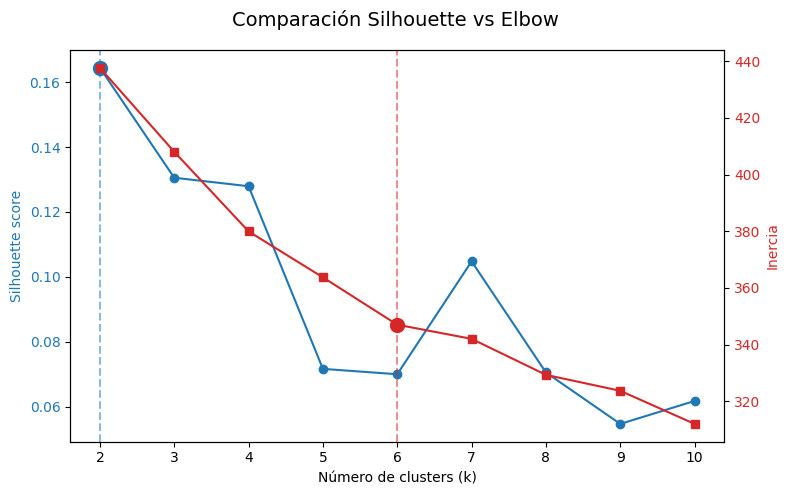

In [49]:
utils.plot_k_diagnostics(sil_result, elbow_result, title="Comparación Silhouette vs Elbow")

FWD Clusters ideales: 3

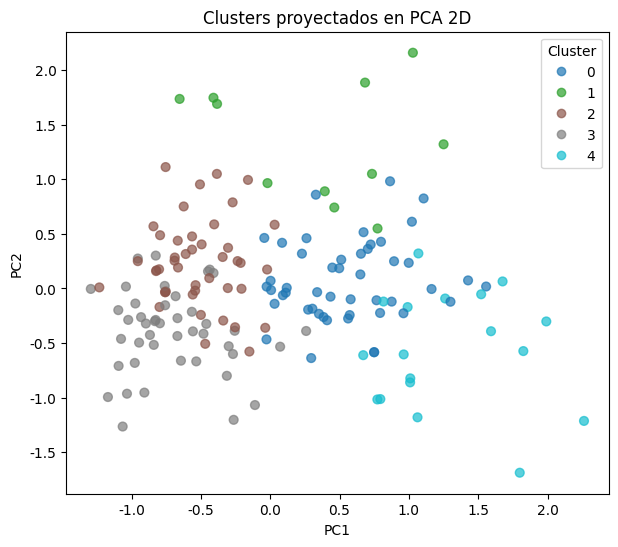

In [55]:
config = utils.auto_configure_clustering(data_fwd, pca_threshold=0.9, k_range=range(2, 11))

# Ajustar con PCA de 10 componentes y 3 clusters
df_clusters, pipe = utils.fit_clusters(
    data_fwd,
    pca_components=config["n_components"],
    n_clusters=5
)

# Graficar clusters en 2D
utils.plot_pca_2d(data_fwd, pipe)

### Midfielders

In [56]:
n_components = utils.optimal_pca_components(data_mid, threshold=0.9)
print(n_components)

36


In [57]:
sil_result, elbow_result = utils.define_k(data_mid, pca_components=n_components)

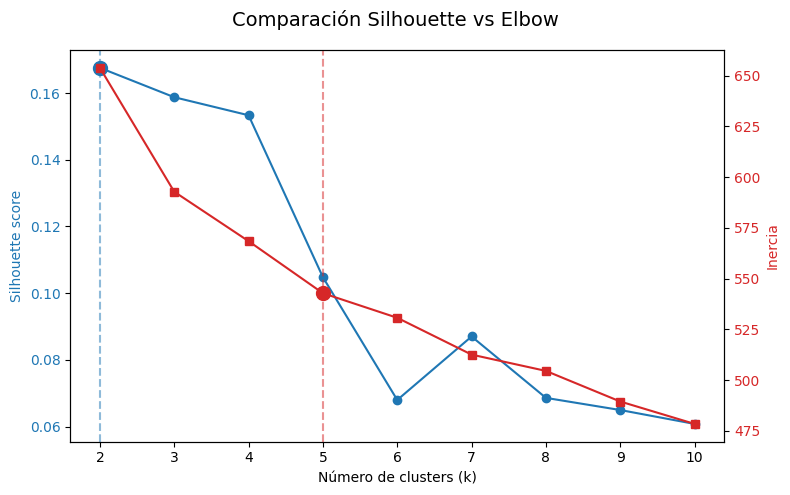

In [58]:
utils.plot_k_diagnostics(sil_result, elbow_result, title="Comparación Silhouette vs Elbow")

MID Clusters ideales: 4

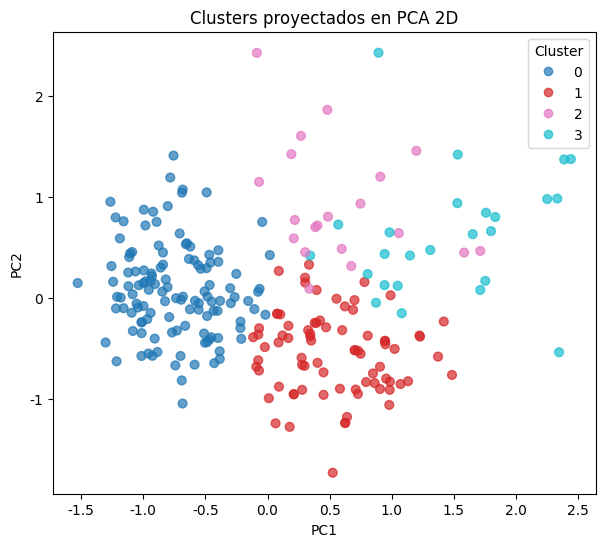

In [68]:
config = utils.auto_configure_clustering(data_mid, pca_threshold=0.9, k_range=range(2, 11))

# Ajustar con PCA de 10 componentes y 3 clusters
df_clusters, pipe = utils.fit_clusters(
    data_mid,
    pca_components=config['n_components'],
    n_clusters=4
)

# Graficar clusters en 2D
utils.plot_pca_2d(data_mid, pipe)

### Defenders

In [78]:
n_components = utils.optimal_pca_components(data_def, threshold=0.99)
print(n_components)

68


In [80]:
sil_result, elbow_result = utils.define_k(data_def, pca_components=n_components)

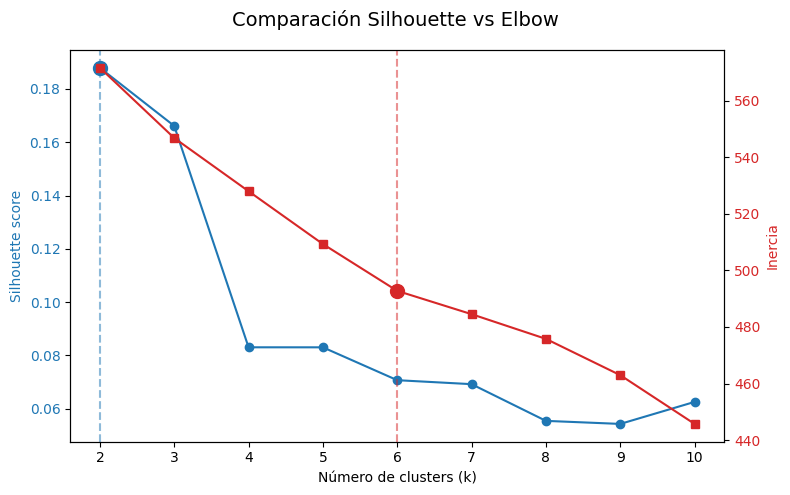

In [81]:
utils.plot_k_diagnostics(sil_result, elbow_result, title="Comparación Silhouette vs Elbow")

DEF Clusters ideales: 4

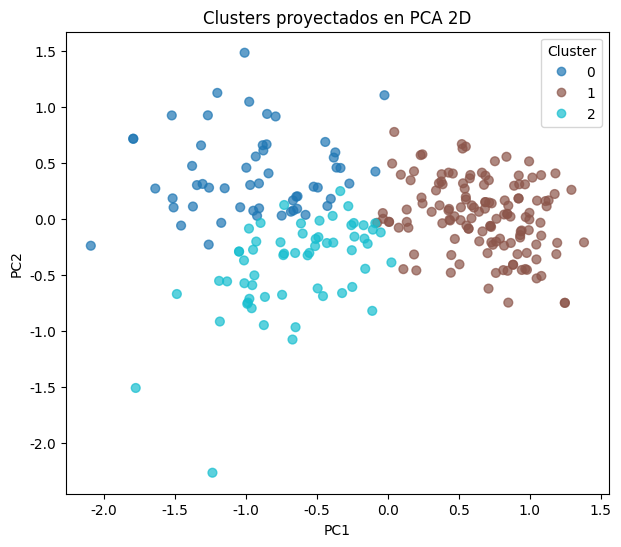

In [90]:
config = utils.auto_configure_clustering(data_def, pca_threshold=0.9, k_range=range(2, 11))

# Ajustar con PCA de 10 componentes y 3 clusters
df_clusters, pipe = utils.fit_clusters(
    data_def,
    pca_components=config['n_components'],
    n_clusters=3
)

# Graficar clusters en 2D
utils.plot_pca_2d(data_def, pipe)

### GK

In [91]:
n_components = utils.optimal_pca_components(data_gk, threshold=0.9)
print(n_components)

22


In [92]:
sil_result, elbow_result = utils.define_k(data_gk, pca_components=n_components)

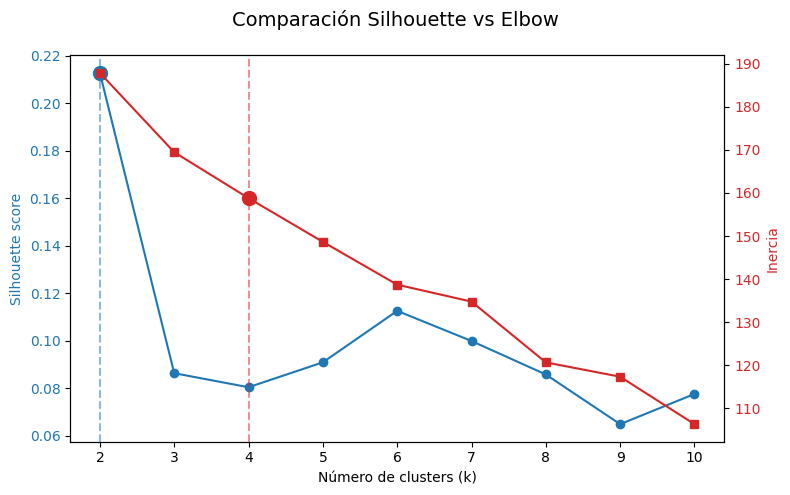

In [93]:
utils.plot_k_diagnostics(sil_result, elbow_result, title="Comparación Silhouette vs Elbow")

GK Clusters ideales: 3

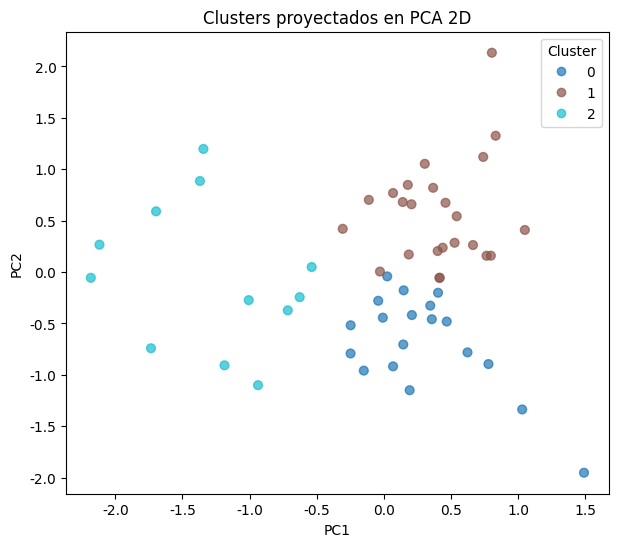

In [96]:
config = utils.auto_configure_clustering(data_gk, pca_threshold=0.90, k_range=range(2, 11))

# Ajustar con PCA de 10 componentes y 3 clusters
df_clusters, pipe = utils.fit_clusters(
    data_gk,
    pca_components=config['n_components'],
    n_clusters=3
)

# Graficar clusters en 2D
utils.plot_pca_2d(data_gk, pipe)

### Experimentar

In [3]:
df_players_stats_final = pd.read_csv('../data/processed/players_stats_mls24.csv')

In [9]:
df_players_stats_final.shape

(727, 273)

In [11]:
df_players_stats_final.isna().sum().sum()

np.int64(0)

In [4]:
df_players_stats_final.columns.to_list()

['team_name',
 'team_id',
 'competition',
 'season',
 'player_id',
 'player_name',
 'first_name',
 'last_name',
 'short_name',
 'position',
 'shirt_number',
 'yellow_cards',
 'unsuccessful_short_passes',
 'tackles_won',
 'goal_assists',
 'goals_from_outside_box',
 'times_tackled',
 'left_foot_goals',
 'successful_passes_own_half',
 'rightside_passes',
 'penalty_goals_conceded',
 'total_unsuccessful_passes',
 'unsuccessful_passes_own_half',
 'unsuccessful_crosses_&_corners',
 'putthrough/blocked_distribution',
 'games_played',
 'unsuccessful_long_passes',
 'aerial_duels_lost',
 'total_fouls_won',
 'aerial_duels',
 'successful_short_passes',
 'successful_dribbles',
 'total_clearances',
 'ground_duels',
 'duels_lost',
 'corners_won',
 'unsuccessful_passes_opposition_half',
 'putthrough/blocked_distribution_won',
 'successful_corners_into_box',
 'appearances',
 'offsides',
 'goals_conceded_inside_box',
 'successful_crosses_open_play',
 'ground_duels_lost',
 'substitute_on',
 'successful_la

In [42]:
with open('../data/pre_raw/squad_info.json', encoding='utf-8') as f:
    squad_info = json.load(f)